# Classify different data sets

### Basic includes

In [5]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

### Classify the Fashion Mnist

---

(60000, 28, 28)


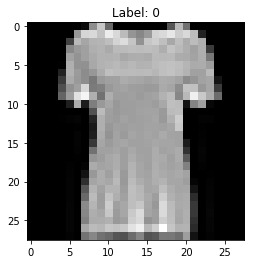

In [6]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [7]:
# Flattenning images
fashion_train_data = fashion_train_data.reshape((60000, 784))
fashion_test_data = fashion_test_data.reshape((10000, 784)) 
fashion_train_data = fashion_train_data.astype('float32') / 255
fashion_test_data = fashion_test_data.astype('float32') / 255

# One hot Encoding
fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

validation_set_labels = fashion_train_labels[50000:]
validation_set = fashion_train_data[50000:]

training_set_labels = fashion_train_labels[:50000]
training_set = fashion_train_data[:50000]

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [8]:
# Define neural network
fashion_model = models.Sequential()

fashion_model.add(layers.Dense(512, activation= "selu", input_shape= (784,)))
fashion_model.add(layers.Dropout(0.3))
fashion_model.add(layers.Dense(256, activation="selu"))
fashion_model.add(layers.Dense(128, activation="selu"))
fashion_model.add(layers.Dropout(0.3))
fashion_model.add(layers.Dense(10, activation="softmax"))

fashion_model.compile(
    loss= "categorical_crossentropy", optimizer= "adamax", metrics= ["accuracy"]
)

fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model training
fashion_epochs = 8
f_history = fashion_model.fit(
    fashion_train_data,
    fashion_train_labels,
    
    epochs= fashion_epochs,
    batch_size= 512,
    
    validation_data= (validation_set, validation_set_labels)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 85us/step - loss: 0.9018 - acc: 0.7185 - val_loss: 0.4638 - val_acc: 0.8338
Epoch 2/8
60000/60000 [==============================] - 8s 142us/step - loss: 0.5398 - acc: 0.8089 - val_loss: 0.4296 - val_acc: 0.8460
Epoch 3/8
60000/60000 [==============================] - 7s 117us/step - loss: 0.4950 - acc: 0.8248 - val_loss: 0.4095 - val_acc: 0.8493
Epoch 4/8
60000/60000 [==============================] - 7s 117us/step - loss: 0.4685 - acc: 0.8341 - val_loss: 0.3847 - val_acc: 0.8612
Epoch 5/8
60000/60000 [==============================] - 8s 140us/step - loss: 0.4414 - acc: 0.8436 - val_loss: 0.3910 - val_acc: 0.8612
Epoch 6/8
60000/60000 [==============================] - 9s 145us/step - loss: 0.4297 - acc: 0.8469 - val_loss: 0.3638 - val_acc: 0.8695
Epoch 7/8
60000/60000 [==============================] - 6s 105us/step - loss: 0.4163 - acc: 0.8515 - val_loss: 0.3393 - val_acc:

In [10]:
fashion_result = fashion_model.evaluate(fashion_test_data, fashion_test_labels)
print('Fashion score: ', fashion_result)

10000/10000 [==============================] - 1s 54us/step
Fashion score:  [0.38835590255260466, 0.8618]


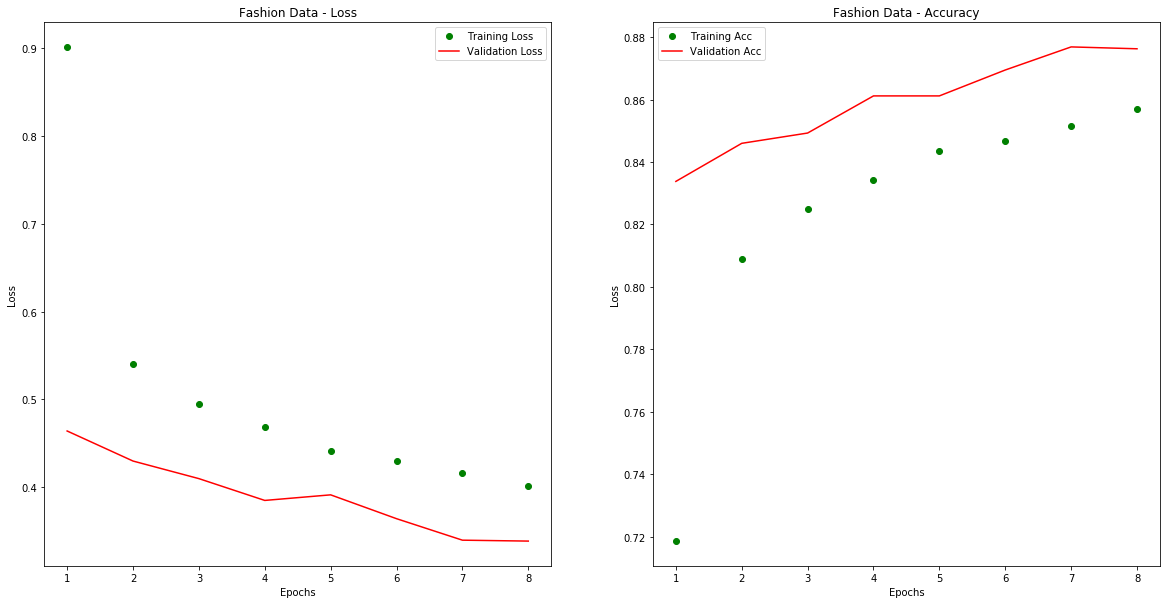

In [11]:
fashion_history = f_history.history
fashion_loss = fashion_history['loss']
fashion_val_loss = fashion_history['val_loss']
fashion_epochs = range(1, len(fashion_loss) + 1)

fashion_acc = fashion_history['acc']
fashion_val_acc = fashion_history['val_acc']

# Plotting results
f, (p1, p2) = plt.subplots(1, 2, figsize=(20,10))
p1.plot(fashion_epochs, fashion_loss, 'go', label='Training Loss')

p1.plot(fashion_epochs, fashion_val_loss, 'r', label='Validation Loss')
p1.set_title('Fashion Data - Loss')
p1.set_xlabel('Epochs')
p1.set_ylabel('Loss')
p1.legend()

p2.plot(fashion_epochs, fashion_acc, 'go', label='Training Acc')
p2.plot(fashion_epochs, fashion_val_acc, 'r', label='Validation Acc')
p2.set_title('Fashion Data - Accuracy')
p2.set_xlabel('Epochs')
p2.set_ylabel('Loss')
p2.legend()

plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [12]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [13]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [14]:
tokenizer = Tokenizer(num_words= 10000)

reuters_train_data_token = tokenizer.sequences_to_matrix(
    reuters_train_data, mode="binary"
)
reuters_test_data_token = tokenizer.sequences_to_matrix(
    reuters_test_data, mode="binary"
)

reuters_one_hot_train_labels = to_categorical(reuters_train_labels)
reuters_one_hot_test_labels = to_categorical(reuters_test_labels)

reuters_val_data = reuters_train_data_token[:1000]
reuters_val_labels = reuters_one_hot_train_labels[:1000]

reuters_train_data = reuters_train_data_token[1000:]
reuters_train_labels = reuters_one_hot_train_labels[1000:]

print('Train Data Set:')
print(reuters_train_data.shape)
print('Train Labels Set:')
print(reuters_train_labels.shape)

print('Validation Data Set:')
print(reuters_val_data.shape)
print('Validation Labels Set:')
print(reuters_val_labels.shape)

print('Test Data Set')
print(reuters_test_data_token.shape)
print('Test Label Set')
print(reuters_one_hot_test_labels.shape)

Train Data Set:
(7982, 10000)
Train Labels Set:
(7982, 46)
Validation Data Set:
(1000, 10000)
Validation Labels Set:
(1000, 46)
Test Data Set
(2246, 10000)
Test Label Set
(2246, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [16]:
reuters_model = models.Sequential()

reuters_model.add(layers.Dense(512, activation="tanh", input_dim=10000))
reuters_model.add(layers.Dropout(0.4))
reuters_model.add(layers.Dense(256, activation="selu"))
reuters_model.add(layers.Dense(128, activation="selu"))
reuters_model.add(layers.Dropout(0.2))
reuters_model.add(layers.Dense(46, activation="softmax"))

reuters_model.compile(
    loss= "categorical_crossentropy", 
    optimizer= "adamax", 
    metrics= ["accuracy"]
)

reuters_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 46)                5934      
Total params: 5,290,670
Trainable params: 5,290,670
Non-trainable params: 0
_________________________________________________________________


In [17]:
reuters_model_history = reuters_model.fit(
    reuters_train_data,
    reuters_train_labels,
    batch_size = 512,
    epochs = 8,
    verbose = 2,
    validation_data = (reuters_val_data, reuters_val_labels)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
 - 4s - loss: 1.6562 - acc: 0.6314 - val_loss: 1.0404 - val_acc: 0.7710
Epoch 2/8
 - 3s - loss: 0.7249 - acc: 0.8421 - val_loss: 0.8505 - val_acc: 0.8260
Epoch 3/8
 - 3s - loss: 0.4596 - acc: 0.9018 - val_loss: 0.8051 - val_acc: 0.8310
Epoch 4/8
 - 2s - loss: 0.3185 - acc: 0.9334 - val_loss: 0.7951 - val_acc: 0.8360
Epoch 5/8
 - 2s - loss: 0.2389 - acc: 0.9475 - val_loss: 0.8258 - val_acc: 0.8310
Epoch 6/8
 - 2s - loss: 0.1928 - acc: 0.9526 - val_loss: 0.8547 - val_acc: 0.8310
Epoch 7/8
 - 3s - loss: 0.1612 - acc: 0.9545 - val_loss: 0.8891 - val_acc: 0.8240
Epoch 8/8
 - 3s - loss: 0.1467 - acc: 0.9575 - val_loss: 0.9130 - val_acc: 0.8230


In [18]:
reuters_result = reuters_model.evaluate(
    reuters_test_data_token, 
    reuters_one_hot_test_labels
)

print('Reuters score: ',reuters_result)

2246/2246 [==============================] - 0s 206us/step
Reuters score:  [0.9961476907704626, 0.807212822796082]


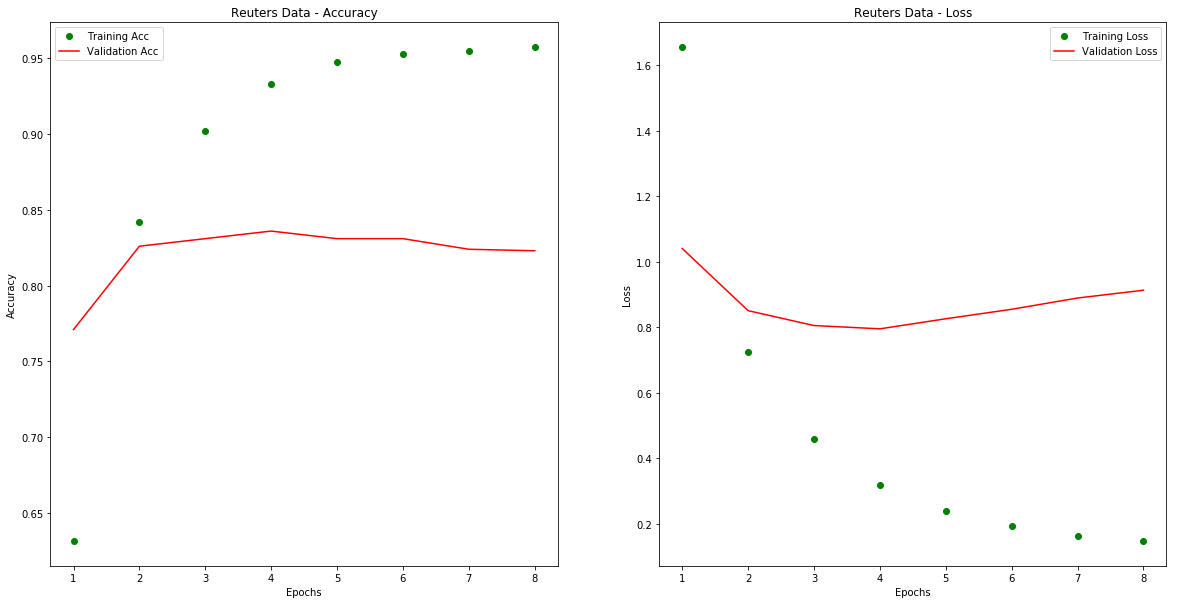

In [19]:
reuters_history = reuters_model_history.history
reuters_loss = reuters_history['loss']
reuters_val_loss = reuters_history['val_loss']
reuters_epochs = range(1, len(reuters_loss) + 1)

reuters_acc = reuters_history['acc']
reuters_val_acc = reuters_history['val_acc']



# Plotting results
f, (p1, p2) = plt.subplots(1, 2, figsize=(20,10))

p1.plot(reuters_epochs, reuters_acc, 'go', label='Training Acc')
p1.plot(reuters_epochs, reuters_val_acc, 'r', label='Validation Acc')
p1.set_title('Reuters Data - Accuracy')
p1.set_xlabel('Epochs')
p1.set_ylabel('Accuracy')
p1.legend()

p2.plot(reuters_epochs, reuters_loss, 'go', label='Training Loss')
p2.plot(reuters_epochs, reuters_val_loss, 'r', label='Validation Loss')
p2.set_title('Reuters Data - Loss')
p2.set_xlabel('Epochs')
p2.set_ylabel('Loss')
p2.legend()

plt.show()

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [20]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

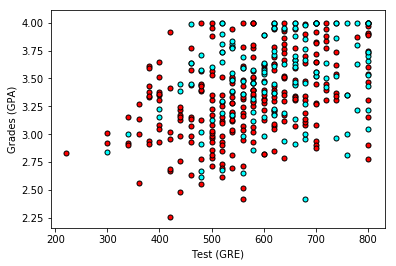

In [21]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

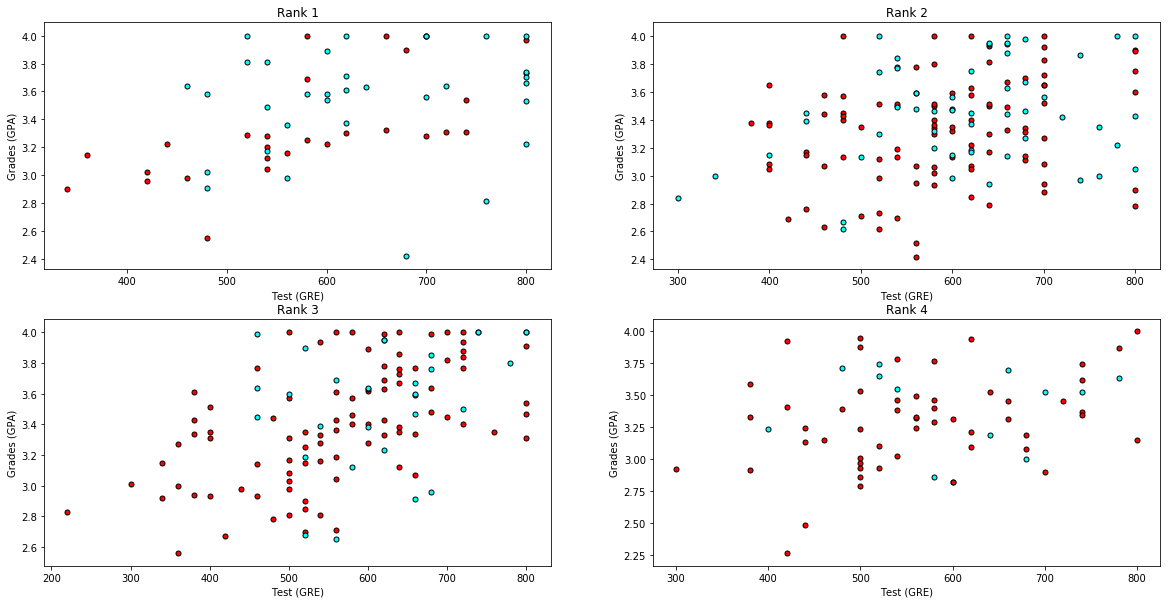

In [22]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [23]:
# Normalize data
student_data.fillna(value= 0, inplace= True)
# Shuffle data
student_data = student_data.sample(frac= 1).reset_index(drop= True)

gre, gpa = np.array(student_data['gre']), np.array(student_data['gpa'])
admit, rank = np.array(student_data['admit']), np.array(student_data['rank'])

# Apply normal distribution
gpa = (gpa - gpa.mean(axis= 0)) / gpa.std(axis= 0)
gre = (gre - gre.mean(axis= 0)) / gre.std(axis= 0)
normalized_student_data = np.zeros((len(gpa), 2))
normalized_student_data[:,0], normalized_student_data[:,1] = gpa, gre

print(normalized_student_data.shape)

# One hot encoding
rank_one_hot = to_categorical(rank)

student_train_data = normalized_student_data[:300]
student_train_labels = rank_one_hot[:300]

student_test_data = normalized_student_data[300:350]
student_test_labels = rank_one_hot[300:350]

student_val_data = normalized_student_data[350:]
student_val_labels = rank_one_hot[350:]

(400, 2)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [24]:
student_model = models.Sequential()

student_model.add(layers.Dense(64, activation= 'sigmoid', input_shape=(2,)))
student_model.add(layers.Dropout(0.4))

student_model.add(layers.Dense(8, activation= 'sigmoid'))
student_model.add(layers.Dense(5,  activation= 'sigmoid'))

student_model.compile(
    optimizer= "rmsprop", 
    loss= "binary_crossentropy", 
    metrics=["accuracy"]
)

student_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                192       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 45        
Total params: 757
Trainable params: 757
Non-trainable params: 0
_________________________________________________________________


In [25]:
student_model_history = student_model.fit(
  student_train_data,
  student_train_labels,
  epochs= 8,
  batch_size= 128,
  validation_data= (student_val_data, student_val_labels),
  verbose= 2
)

Train on 300 samples, validate on 50 samples
Epoch 1/8
 - 1s - loss: 0.7079 - acc: 0.4800 - val_loss: 0.6886 - val_acc: 0.5680
Epoch 2/8
 - 0s - loss: 0.6895 - acc: 0.5367 - val_loss: 0.6751 - val_acc: 0.6320
Epoch 3/8
 - 0s - loss: 0.6787 - acc: 0.6007 - val_loss: 0.6642 - val_acc: 0.7440
Epoch 4/8
 - 0s - loss: 0.6677 - acc: 0.6480 - val_loss: 0.6544 - val_acc: 0.7640
Epoch 5/8
 - 0s - loss: 0.6571 - acc: 0.6980 - val_loss: 0.6456 - val_acc: 0.8080
Epoch 6/8
 - 0s - loss: 0.6510 - acc: 0.7033 - val_loss: 0.6375 - val_acc: 0.7960
Epoch 7/8
 - 0s - loss: 0.6403 - acc: 0.7467 - val_loss: 0.6298 - val_acc: 0.8000
Epoch 8/8
 - 0s - loss: 0.6320 - acc: 0.7653 - val_loss: 0.6224 - val_acc: 0.8000


In [26]:
student_result = student_model.evaluate(
  student_test_data,
  student_test_labels
)

print('Student score:',student_result)

50/50 [==============================] - 0s 56us/step
Student score: [0.6287255167961121, 0.7960000610351563]


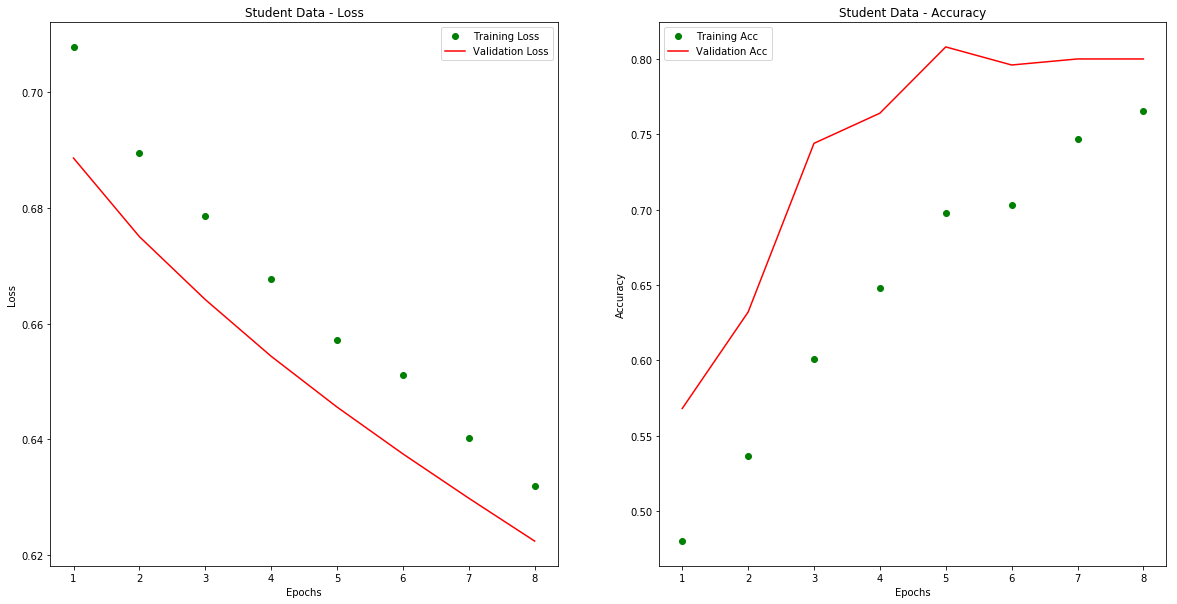

In [27]:
student_history = student_model_history.history

student_val_loss = student_history['val_loss']
student_loss = student_history['loss']
student_epochs = range(1, len(student_loss) + 1)

student_val_acc = student_history['val_acc']
student_acc = student_history['acc']

# Plotting results
f, (p1, p2) = plt.subplots(1, 2, figsize=(20,10))

p1.plot(student_epochs, student_loss, 'go', label= "Training Loss")
p1.plot(student_epochs, student_val_loss, 'r', label= "Validation Loss")
p1.set_title("Student Data - Loss")
p1.set_ylabel("Loss")
p1.set_xlabel("Epochs")
p1.legend()

p2.plot(student_epochs, student_acc, 'go', label= "Training Acc")
p2.plot(student_epochs, student_val_acc, 'r', label= "Validation Acc")
p2.set_title("Student Data - Accuracy")
p2.set_ylabel("Accuracy")
p2.set_xlabel("Epochs")
p2.legend()

plt.show()